In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import collections
%matplotlib inline

# Rank schools with my interests only

In [2]:
info_df = pd.read_csv('../CSrankings/generated-author-info.csv')
info_grouped = info_df.groupby('name')
info_grouped_dic = dict(list(info_grouped))

In [21]:
info_recent_df = info_df[info_df['year'] > 2013]

In [22]:
info_by_dpt_dic = dict(list(info_recent_df.groupby('dept')))

In [5]:
with open('area_rank.json') as f:
    area_rank_dic = json.load(f)

In [6]:
with open('area_map.json') as f:
    area_map = json.load(f)

In [7]:
interest_area = ['ML', 'AI', 'NLP', 'Vision', 'Comp']

In [23]:
area_dept_rank_dic = {}
for a in interest_area:
    _srs = pd.Series(area_rank_dic[a])
    sorted_srs = _srs.sort_values(ascending=False)[:100]
    _li = []
    for name in sorted_srs.index:
        _li.append(info_grouped_dic[name]['dept'].value_counts().index[0])
    li_count = collections.Counter(_li)
    area_dept_rank_dic[a] = dict(li_count.most_common(50))

In [24]:
sorted_school_df = pd.DataFrame(area_dept_rank_dic).sum(axis=1).sort_values(ascending=False)

In [25]:
pd.DataFrame(area_dept_rank_dic)['Comp'].dropna().sort_values(ascending=False)

Carnegie Mellon University                5.0
Massachusetts Institute of Technology     4.0
Tel Aviv University                       4.0
University of California - Los Angeles    4.0
Univ. of Illinois at Urbana-Champaign     3.0
University of California - San Diego      3.0
Pennsylvania State University             3.0
University of Toronto                     3.0
Max Planck Institute                      3.0
National University of Singapore          2.0
Duke University                           2.0
Princeton University                      2.0
Rice University                           2.0
McGill University                         2.0
Rutgers University                        2.0
Stony Brook University                    2.0
Texas A&M University                      2.0
Stanford University                       2.0
University of California - Riverside      2.0
University of Connecticut                 2.0
Brown University                          2.0
University of Washington          

In [26]:
info_by_dpt_dic['University of Maryland - College Park'].groupby('name').sum()['adjustedcount'].sort_values(ascending=False)

name
Dinesh Manocha               11.366667
Larry S. Davis                9.314683
Jordan L. Boyd-Graber         9.059524
Rama Chellappa                8.100000
Hal Daumé III                 7.892857
Mohammad Taghi Hajiaghayi     7.273016
Jonathan Katz                 6.480159
Niklas Elmqvist               5.039286
Charalampos Papamanthou       4.883333
Daniel J. Abadi               4.875000
John P. Dickerson             4.550000
Michelle L. Mazurek           4.186905
Amol Deshpande                3.700000
Michael W. Hicks              3.459524
Philip Resnik                 3.366667
Tom Goldstein                 3.361905
Dave Levin                    3.315873
Yiannis Aloimonos             3.283333
Gang Qu                       3.226190
Aravind Srinivasan            3.100000
Ming C. Lin                   2.950000
David W. Jacobs               2.842857
David Van Horn                2.842857
Tudor Dumitras                2.835714
Abhinav Shrivastava           2.700000
Nirupam Roy         

# Filter only US schools

In [27]:
country_df = pd.read_csv('../CSrankings/country-info.csv', index_col=0)
country_df.head()

,region
institution,
Aalto University,europe
Aarhus University,europe
Aalborg University,europe
American University of Beirut,asia
Ariel University,europe


In [28]:
country_df['region'].value_counts()

europe          112
asia             72
canada           24
southamerica     18
australasia      17
africa            2
 europe           1
Name: region, dtype: int64

In [29]:
sorted_school_df.head()

Carnegie Mellon University                27.0
University of California - Berkeley       13.0
Massachusetts Institute of Technology     12.0
Stanford University                       12.0
University of California - Los Angeles    11.0
dtype: float64

In [30]:
len(sorted_school_df)

126

In [31]:
sorted_US_df = sorted_school_df.drop(country_df.index, errors='ignore')
sorted_US_df

Carnegie Mellon University                27.0
University of California - Berkeley       13.0
Massachusetts Institute of Technology     12.0
Stanford University                       12.0
University of California - Los Angeles    11.0
Cornell University                        11.0
University of California - San Diego       9.0
University of Maryland - College Park      9.0
Columbia University                        9.0
University of Texas at Austin              8.0
University of Pennsylvania                 8.0
Johns Hopkins University                   8.0
University of Michigan                     7.0
Univ. of Illinois at Urbana-Champaign      7.0
Rutgers University                         6.0
Brown University                           6.0
Georgia Institute of Technology            6.0
University of Washington                   5.0
Oregon State University                    4.0
University of California - Irvine          4.0
Duke University                            4.0
University of

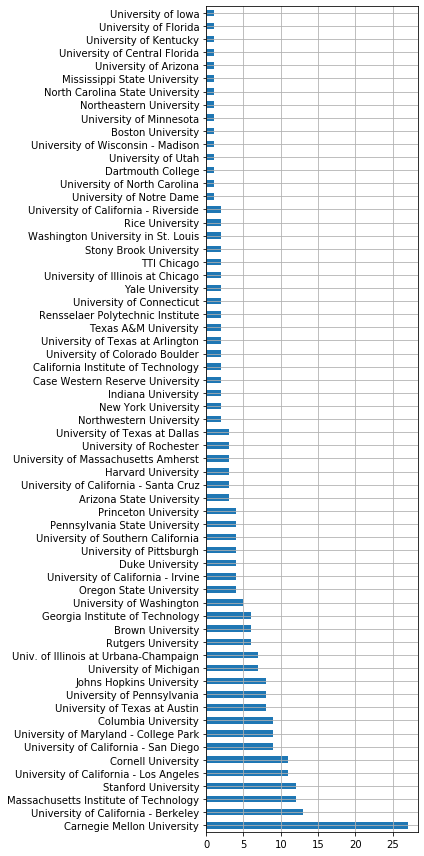

In [50]:
plt.figure(figsize=(6,12))
sorted_US_df.plot.barh()
plt.grid()
plt.tight_layout()
plt.savefig('sorted_school_scores.png')

In [34]:
info_by_dpt_dic['University of Southern California'].groupby('name').sum()['adjustedcount'].sort_values(ascending=False)

name
Gaurav S. Sukhatme        9.551190
Ilias Diakonikolas        8.350000
Chao Wang 0001            8.233333
Fei Sha                   6.466667
David Kempe 0001          5.500000
Milind Tambe              5.080988
Shaddin Dughmi            4.866667
Xuehai Qian               4.813366
Ramakant Nevatia          4.757576
Ramesh Govindan           4.134325
Xiang Ren                 3.946429
Haipeng Luo               3.533333
Hao Li 0015               3.524206
Sven Koenig               3.492857
Murali Annavaram          3.478968
Yan Liu 0002              3.316667
Joseph J. Lim             3.085714
Nora Ayanian              3.042857
William G. J. Halfond     2.709524
Laurent Itti              2.700000
Jernej Barbic             2.476190
Cyrus Shahabi             2.450000
Muhammad Naveed 0001      1.961905
Ulrich Neumann            1.959524
Nenad Medvidovic          1.750000
Jyotirmoy V. Deshmukh     1.683333
Maja J. Mataric           1.666667
Shrikanth S. Narayanan    1.283333
Viktor K. Prasa

In [42]:
dict(info_by_dpt_dic['University of Southern California'].groupby('name').sum()['adjustedcount'].sort_values(ascending=False))

{'Gaurav S. Sukhatme': 9.551190476182999,
 'Ilias Diakonikolas': 8.350000000001,
 'Chao Wang 0001': 8.233333333335,
 'Fei Sha': 6.466666666666001,
 'David Kempe 0001': 5.499999999998,
 'Milind Tambe': 5.080988455986,
 'Shaddin Dughmi': 4.866666666666,
 'Xuehai Qian': 4.813365800866101,
 'Ramakant Nevatia': 4.757575757574,
 'Ramesh Govindan': 4.134325396825,
 'Xiang Ren': 3.946428571429,
 'Haipeng Luo': 3.533333333333,
 'Hao Li 0015': 3.524206349206,
 'Sven Koenig': 3.492857142856,
 'Murali Annavaram': 3.4789682539680005,
 'Yan Liu 0002': 3.31666666667,
 'Joseph J. Lim': 3.085714285713,
 'Nora Ayanian': 3.0428571428569997,
 'William G. J. Halfond': 2.7095238095230005,
 'Laurent Itti': 2.699999999999,
 'Jernej Barbic': 2.47619047619,
 'Cyrus Shahabi': 2.45,
 'Muhammad Naveed 0001': 1.961904761904,
 'Ulrich Neumann': 1.9595238095229999,
 'Nenad Medvidovic': 1.75,
 'Jyotirmoy V. Deshmukh': 1.6833333333329998,
 'Maja J. Mataric': 1.666666666667,
 'Shrikanth S. Narayanan': 1.283333333333,
 '

In [43]:
faculties_dic = {}
for school in sorted_US_df.index:
    faculties_dic[school] = dict(info_by_dpt_dic[school].groupby('name').sum()['adjustedcount'].sort_values(ascending=False))

In [44]:
faculties_dic.keys()

dict_keys(['Carnegie Mellon University', 'University of California - Berkeley', 'Massachusetts Institute of Technology', 'Stanford University', 'University of California - Los Angeles', 'Cornell University', 'University of California - San Diego', 'University of Maryland - College Park', 'Columbia University', 'University of Texas at Austin', 'University of Pennsylvania', 'Johns Hopkins University', 'University of Michigan', 'Univ. of Illinois at Urbana-Champaign', 'Rutgers University', 'Brown University', 'Georgia Institute of Technology', 'University of Washington', 'Oregon State University', 'University of California - Irvine', 'Duke University', 'University of Pittsburgh', 'University of Southern California', 'Pennsylvania State University', 'Princeton University', 'Arizona State University', 'University of California - Santa Cruz', 'Harvard University', 'University of Massachusetts Amherst', 'University of Rochester', 'University of Texas at Dallas', 'Northwestern University', 'Ne

In [45]:
faculties_json = json.dumps(faculties_dic)
with open('faculties_by_interests.json', 'w') as f:
    f.write(faculties_json)